In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy
import sympy
from sympy.plotting import plot_implicit

## 1.Offer Curve 

There are infinite types of agents named  $i\in \mathbb{Z}^+ $ which is indexed by the period of birth. Agents lives two periods. They get endowment and consume only when they are alive. There is no uncertainty in the economy. At date 1, old agents are endowed with $M>0$ units of intrinsically worthless currency. 
The household problem is : 
    \begin{gather*}
    \max \frac{(c^i_i)^{1-\eta}}{1-\eta} + \frac{(c^i_{i+1})^{1-\eta}}{1-\eta}  \\ 
        c^i_i+\frac{m^i_i}{p_i} \le y_i^i\\
        c^i_{i+1}\le \frac{m^i_i}{p_{i+1}}+y^i_{i+1}\\
        m_i \ge 0
    \end{gather*}
we set $\alpha_i=p_{i+1} / p_i$ which denotes gross inflation rate. The budget constraint is rewritten as 

\begin{gather*}
{\rm s.t.} \ c_i^i +\alpha_i c^i_{i+1} \le y_i^i +\alpha_i y_{i+1}^i
\end{gather*}

The offer curves solves the following pair of first order equations
\begin{gather*}
   (\frac{c^i_i}{c^i_{i+1}})^\eta = \alpha_i \\
   \ c_i^i +\alpha_i c^i_{i+1} = y_i^i +\alpha_i y^i_{i+1}
\end{gather*}
Thus, the offer curve is denoted as 
\begin{gather*}
    c^i_i = \frac{y^i_i + \alpha_i y^i_{i+1}}{\alpha_i^{1-1/\eta}+1}, \ c_{i+1}^i = \frac{\alpha_i^{-1/\eta} y^i_i + \alpha_i^{1-1/\eta} y^i_{i+1}}{\alpha_i^{1-1/\eta}+1}
\end{gather*}

An allocation is stationary if it does not depend on time $c^i_{i+1}=c_o,c_i^i=c_y,\forall i \ge 1$.  The equilibrium with a stationary allocation is called **stationary equilibrium**

Suppose $y^i_i = y_1, y^i_{i+1} = y_2 , y_1 > y_2>0 $, then we can use market clearing condition to find out that this economy has two stationary equilibrium   
\begin{gather*}
 c_y + c_o  = \frac{y_1  + \alpha y_2 }{\alpha^{1-1/\eta}+1} + \frac{\alpha^{-1/\eta} y_1 + \alpha^{1-1/\eta} y_2 }{\alpha^{1-1/\eta}+1} = y_1 + y_2  \\ 
\Rightarrow  y_1  + \alpha y_2 + \alpha^{-1/\eta} y_1 + \alpha^{1-1/\eta} y_2 = ( y_1 + y_2)(\alpha^{1-1/\eta}+1) \\ 
  \Rightarrow (1-\alpha)(\alpha^{-1/\eta} y_1 - y_2 ) =  0
\end{gather*}

Thus, the stationary equilibriums are as follows

(1) Monetary equilibrium (High interest equilibrium)
\begin{gather*}
(c_y , c_o) = (\frac{y_1+y_2}{2},\frac{y_1+y_2}{2}) \\
\alpha  = 1 
\end{gather*}

(2) Autarky equilibrium (Low interest equilibrium)
\begin{gather*}
(c_y , c_o)  = (y_1, y_2) \\
\alpha  = (\frac{y_1}{y_2})^\eta 
\end{gather*}
However the Autarky equilibrium fails to satisfy the assumption to deliver first fundamental theorem of welfare economics, which is the value of aggregate endowment at the equilibrium prices is finite. 

In [18]:
# set parameter 
y_1 = 1 
y_2 = 0.5
η = 0.5
num = 1000
α_max = y_2**(-η)
α_i = np.linspace(0.01,α_max*1.2,num)

# the optimal consumption and offer curve
c_1_initial = (y_1 + α_i*y_2)/(α_i**(1-1/η)+1)
c_2_initial =  (1/α_i)**(1/η)*c_1_initial
c_2 = np.sort(c_2_initial)
c_1 = np.zeros(num)
for i in range(num): # get c_1 in order 
    order = np.argmax(c_2[i] == c_2_initial)
    c_1[i] = c_1_initial[order]

# Feasible line 
x = np.linspace(0.01,y_1 + y_2,100)
y = y_1 + y_2 - x 


In [10]:
# there are the approximate solutions of stationary equilibrium
for i in range(num):
    if np.abs(c_1[i] + c_2[i] -y_1 - y_2 )< 1e-4:
        print('solution is c_1 = {}, c_2 ={}'.format(c_1[i],c_2[i]))

solution is c_1 = 0.7497528537523395, c_2 =0.750346137706263


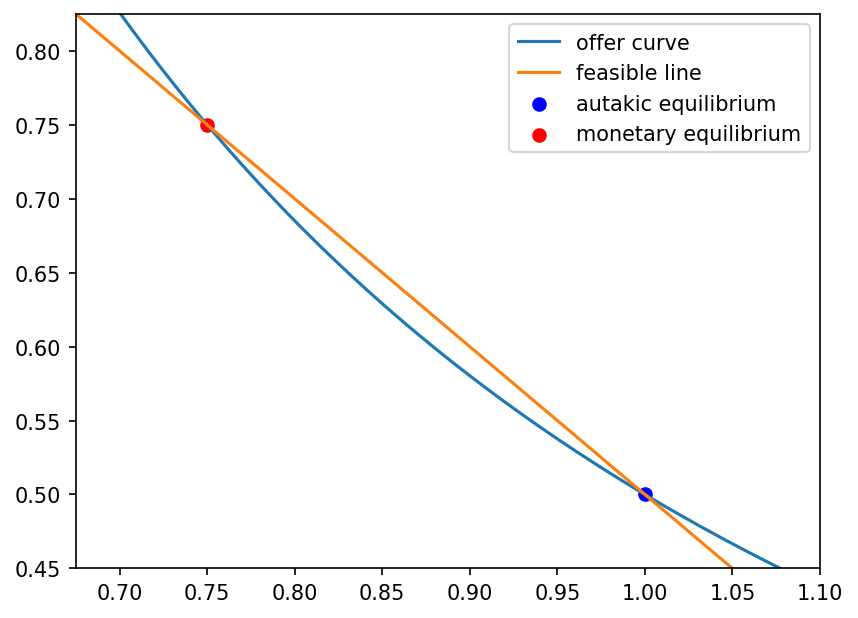

In [28]:
#Plot offer curver and stationary equilibrium
plt.figure(dpi=150)
plt.plot(c_1,c_2,label = 'offer curve')
plt.plot(x,y,label = 'feasible line')
plt.scatter(y_1,y_2,label='autakic equilibrium',color='b')
plt.scatter((y_1+y_2)/2,(y_1+y_2)/2,label = 'monetary equilibrium',color='r')

plt.xlim((y_1+y_2)/2*0.9,y_1*1.1)
plt.ylim(y_2*0.9,(y_1+y_2)/2*1.1)
plt.legend()

# 2. Trace Path of nonstatinoray equilibrium

In [11]:
def convergence(c_0,steps=5):
    """ given the initial consumption, calculate the transitional equilibrium
    """
    c_young = np.ones(steps+1)
    c_old = np.ones(steps+1)
    c_young[0]=c_0
    
    for i in range(steps):
        old_order = np.argmin(np.abs(c_young[i] - c_1))
        c_old[i] = c_2[old_order] #offer curve to get old counsumption 
        c_young[i+1] = y_1 + y_2 - c_old[i]
        if i == steps - 1:
            old_order = np.argmin(np.abs(c_young[i+1] - c_1))
            c_old[i+1] = c_2[old_order]
    return c_old,c_young

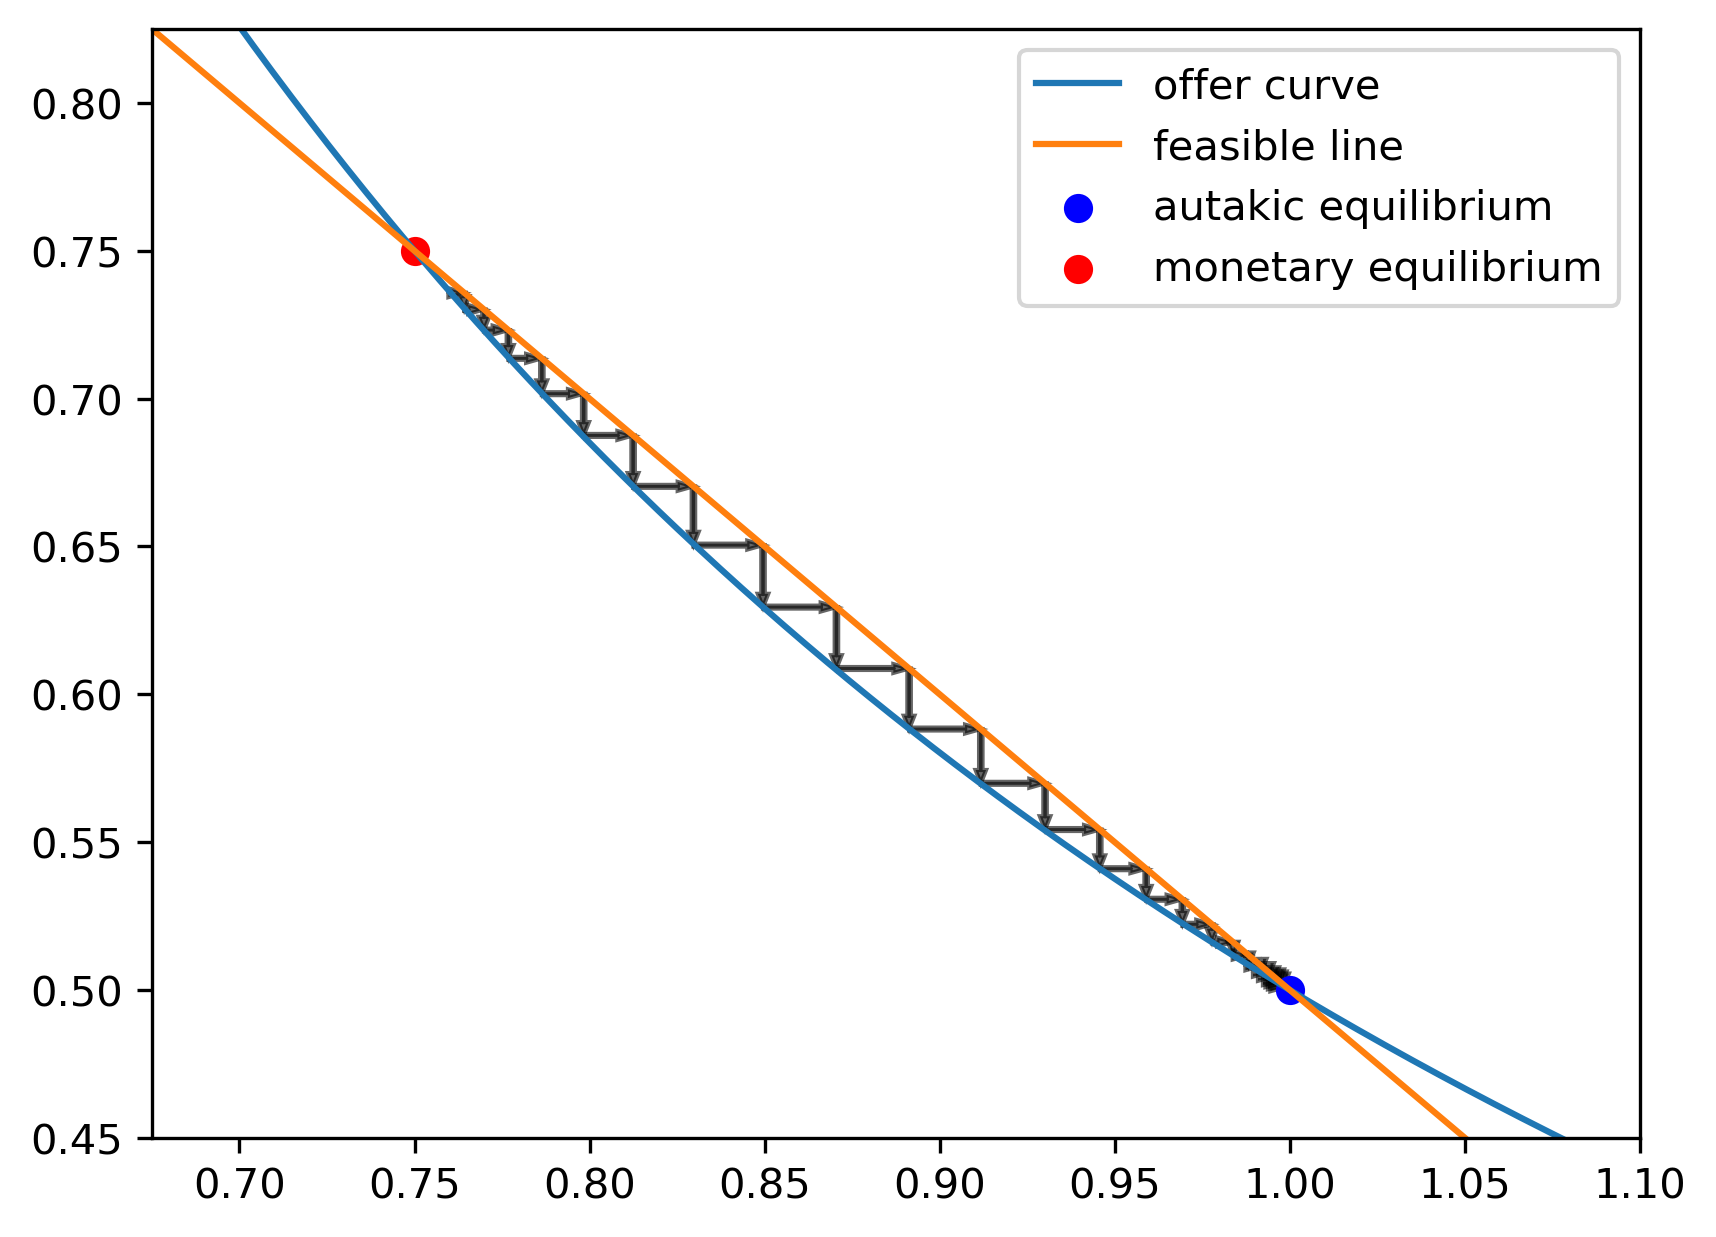

In [25]:
def plot_dynamics(arrow = True ):
    steps = 30  
    initial_c = 0.76

    c_old,c_young = convergence(initial_c,steps)  # get tra
    
    plt.figure(dpi=300)
    arrow_args = dict(fc="k", ec="k", length_includes_head=True, lw=1,alpha=0.6)
    if arrow == True:
        for i in range(steps -1):
            plt.arrow(c_young[i],c_old[i],c_young[i+1]-c_young[i],0,**arrow_args)
            plt.arrow(c_young[i+1],c_old[i],0,c_old[i+1]-c_old[i],**arrow_args)

    plt.plot(c_1,c_2,label = 'offer curve')
    plt.plot(x,y,label = 'feasible line')
    plt.scatter(y_1,y_2,label='autakic equilibrium',color='b')
    plt.scatter((y_1+y_2)/2,(y_1+y_2)/2,label = 'monetary equilibrium',color='r')

    plt.xlim((y_1+y_2)/2*0.9,y_1*1.1)
    plt.ylim(y_2*0.9,(y_1+y_2)/2*1.1)
    plt.legend()
    
plot_dynamics(arrow =True)

## Real Money Balance
The following first order difference equation depicts the dynamics of real money balance
$$\frac{q_{t+1}}{(q_{t+1}+y_2)^\eta} = \frac{q_t}{(y_1 - q_t)^\eta}$$

In [19]:
q_num = 1000  
y_vec = np.linspace(0,2,q_num)
x_vec = np.zeros(q_num)
x_vec[0] = 0 

#x = sympy.Symbol('x')  # given y, we calculate x 
#for i in range(q_num):
#    x_vec[i] = np.min(sympy.solvers.solve(x/(y_1-x)**η - y_vec[i]/(y_2+y_vec[i])**η,
#                                          x))

for i in range(1,q_num):
    f = lambda x : y_vec[i]/(y_2 + y_vec[i])**η - x/(y_1-x)**η
    x_vec[i] = scipy.optimize.newton(f,0.5)

f_q = interpolate.interp1d(y_vec,x_vec)

In [20]:
def q_dynamic(q0,steps = 10):
    """ given initial real money balance, calculate its dynamic
    """
    q_next = np.zeros(steps+1)
    q_next[0] = q0
    
    for i in range(steps):
        q_order = np.argsort(np.abs(q_next[0] - x_vec))[:10]
        q_next[i] = np.min(y_vec[q_order])
    
    return q_next
q_steps = 20  
q_vec = q_dynamic(0.21,q_steps) # dynamic path

q_vec

array([0.18818819, 0.16216216, 0.16216216, 0.16216216, 0.16216216,
       0.16216216, 0.16216216, 0.16216216, 0.16216216, 0.16216216,
       0.16216216, 0.16216216, 0.16216216, 0.16216216, 0.16216216,
       0.16216216, 0.16216216, 0.16216216, 0.16216216, 0.16216216,
       0.        ])

[0.18818819 0.16216216 0.16216216 0.16216216 0.16216216 0.16216216
 0.16216216 0.16216216 0.16216216 0.16216216 0.16216216 0.16216216
 0.16216216 0.16216216 0.16216216 0.16216216 0.16216216 0.16216216
 0.16216216 0.16216216 0.        ]


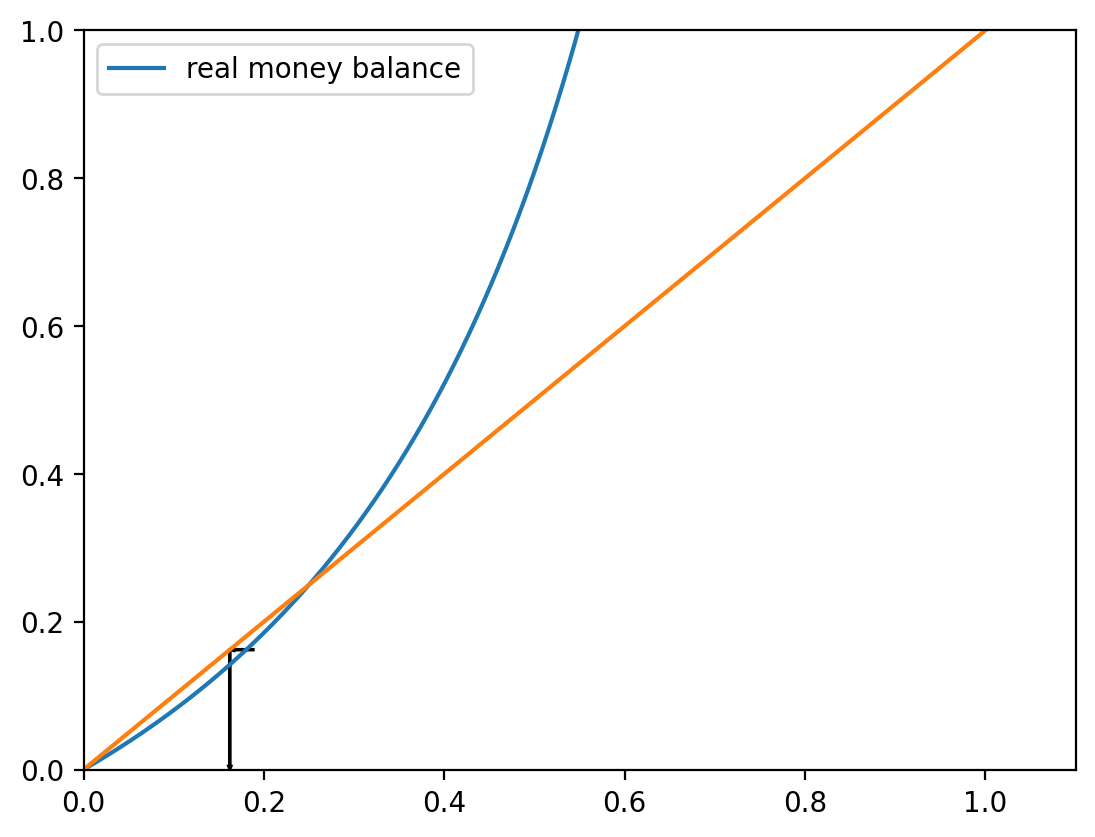

In [21]:
fig = plt.figure(dpi=200)
arrow_args = dict(fc="k", ec="k", length_includes_head=True, linewidth=1,
                  alpha=1)
for i in range(q_steps -1):
    plt.arrow(q_vec[i],q_vec[i+1],q_vec[i+1]- q_vec[i],0,**arrow_args)
    plt.arrow(q_vec[i+1],q_vec[i+1],0,q_vec[i+2] -q_vec[i+1],**arrow_args)
    
plt.plot(x_vec,y_vec,label = 'real money balance')
plt.plot(y_vec,y_vec)



plt.xlim(0,1.1)
plt.ylim(0,1)
plt.legend()

print(q_vec)

In [22]:
f_q(0.15)

array(0.16954738)